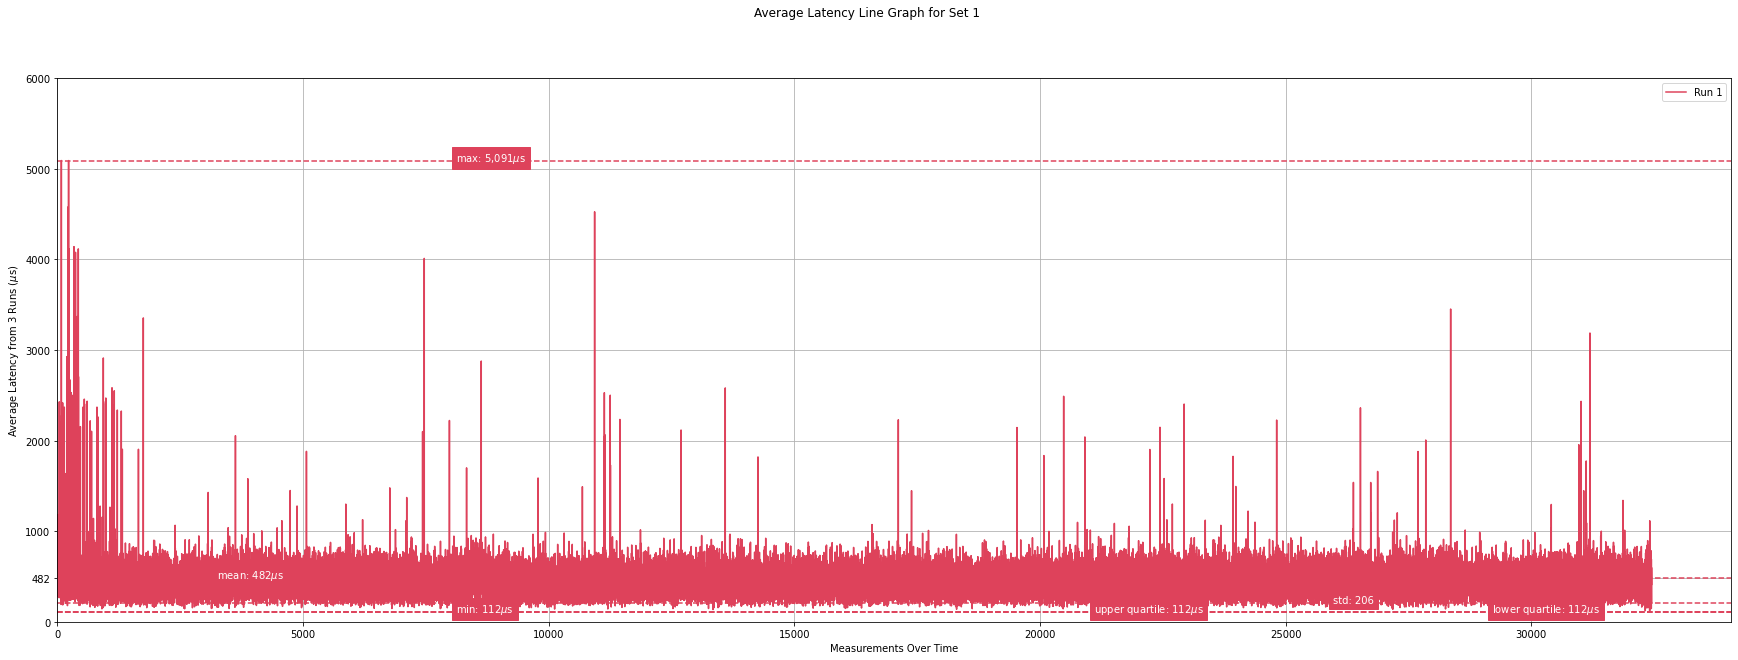

In [12]:
from all_functions import *

all_files = get_files('data/set_1')
all_files = [file for file in all_files if 'average' in file]

def plot_average(ax, df, colour):
    mean_value = df.mean()
    formatted_mean = format_number(mean_value)
    
    ax.axhline(mean_value, 0, 1, c=colour, ls="--", label=None)
    ax.text(len(df.index) * 0.1, mean_value, 'mean: %s$\mu$s' %formatted_mean, color='white', backgroundcolor=colour)
    ax = add_ax_ticks(ax, 'y', (mean_value, ))

    return ax

def add_ax_ticks(ax, axis, ticks):
    """
      Plot added values as ticks on the axis.
    
      Parameters:
        ax (Axes): Axes to plot on.
        axis (string): Either x or y: specifies the axis to add values to.
        ticks ( (int/float) or [int/float] ): List/tuple of values to add to the axis.
    
      Returns:
        None 
    """
    tuple(ticks)

    if 'y' in axis:
        yticks = (tuple(ax.get_yticks()) + (ticks))
        _ = ax.set_yticks(tuple(yticks))
    else:
        xticks = (tuple(ax.get_xticks()) + (ticks))
        _ = ax.set_xticks(tuple(xticks))

    return ax

def plot_stat(ax, df, stat, colour):
    """
      Plot a statistic on the graph.
    
      Parameters:
        ax (Axis): Axis to plot on.
        df (DataFrame): DataFrame to produce metrics from.
        stat (string): Type of stat to plot.
    
      Returns:
        None 
    """
    if 'min' in stat:
        value = df.min()
        formatted_value = 'min: %s$\mu$s' %format_number(value)
        x = len(df.index) * 0.25
        y = value
    elif 'max' in stat:
        value = df.max()
        formatted_value = 'max: %s$\mu$s' %format_number(value)
        x = len(df.index) * 0.25
        y = value
    elif 'std' in stat:
        value = df.std()
        formatted_value = 'std: %s' %format_number(value)
        x = len(df.index) * 0.8
        y = value
    elif 'upper_quartile' in stat:
        value = df.min()
        formatted_value = 'upper quartile: %s$\mu$s' %format_number(value)
        x = len(df.index) * 0.65
        y = value
    elif 'lower_quartile' in stat:
        value = df.min()
        formatted_value = 'lower quartile: %s$\mu$s' %format_number(value)
        x = len(df.index) * 0.9
        y = value

    ax.axhline(value, 0, 1, c=colour, ls="--", label=None)
    ax.text(x, y, formatted_value, color='white', backgroundcolor=colour)

def plot_summary_data(ax, df, colour):
    """
      Plot summary data on a graph. Data such as min, max, std, lower/upper quartile.
    
      Parameters:
        ax (Axis): Axis to plot on.
        df (DataFrame): To produce summary data from.
        df_col (string): Optional. Name of DataFrame column to plot.
        colour (string): Colour of the stats.

      Returns:
        None
    """
    
    plot_stat(ax, df, 'min', colour)
    plot_stat(ax, df, 'max', colour)
    plot_stat(ax, df, 'std', colour)
    plot_stat(ax, df, 'upper_quartile', colour)
    plot_stat(ax, df, 'lower_quartile', colour)

    # min_value = df.min()
    # formatted_min = format_number(min_value)
    # ax.axhline(min_value, 0, 1, c=colour, ls="--", label=None)
    # ax.text(len(df.index) * 0.25, min_value, 'min: %s$\mu$s' %formatted_min, color='white', backgroundcolor=colour)
    # ax = add_ax_ticks(ax, 'y', (min_value, ))

    # max_value = df.max()
    # formatted_max = format_number(max_value)
    # ax.axhline(max_value, 0, 1, c=colour, ls="--", label=None)
    # ax.text(len(df.index) * 0.25, max_value, 'max: %s$\mu$s' %formatted_max, color='white', backgroundcolor=colour)
    # ax = add_ax_ticks(ax, 'y', (max_value, ))

    # std_value = df.std()
    # formatted_std = format_number(std_value)
    # ax.axhline(std_value, 0, 1, c=colour, ls="--", label=None)
    # ax.text(len(df.index) * 0.65, std_value, 'std: %s$\mu$s' %formatted_std, color='white', backgroundcolor=colour)
    # ax = add_ax_ticks(ax, 'y', (std_value, ))

    # lower_quartile_value = df.quantile(0.25)
    # formatted_lower_quartile = format_number(lower_quartile_value)
    # ax.axhline(lower_quartile_value, 0, 1, c=colour, ls="--", label=None)
    # ax.text(len(df.index) * 0.8, lower_quartile_value, 'lower quartile: %s$\mu$s' %formatted_lower_quartile, color='white', backgroundcolor=colour)
    # ax = add_ax_ticks(ax, 'y', (lower_quartile_value, ))

    # upper_quartile_value = df.quantile(0.25)
    # formatted_upper_quartile = format_number(upper_quartile_value)
    # ax.axhline(upper_quartile_value, 0, 1, c=colour, ls="--", label=None)
    # ax.text(len(df.index) * 0.95, upper_quartile_value, 'upper quartile: %s$\mu$s' %formatted_upper_quartile, color='white', backgroundcolor=colour)
    # ax = add_ax_ticks(ax, 'y', (upper_quartile_value, ))

def plot_graph(ax, df, options):
    """
      Plot data from a DataFrame onto an Axes configured with options.
    
      Parameters:
        ax (Axes): Axes to plot graph on.
        df (DataFrame): DataFrame to plot from.
        options (Dictionary):
            df_col (string): Optional. Name of column to get data from.
            line_colour (string): Colour of line.
            graph_type (string): Type of graph. e.g. 'bar', 'line', 'cdf'
            show_grid (Boolean): Show the gridlines or not.
            y_label (string): Label for y-axis.
            x_label (string): Label for x-axis.
            title (string): Graph title.
            show_legend (Boolean): Show the legend or not.
            y_log (Boolean): Use log scale on y-axis.
            x_log (Boolean): Use log scale on x-axis.
            y_min (int/float): Start y-axis from this value.
            y_max (int/float): End y-axis at this value.
            x_min (int/float): Start x-axis from this value.
            x_max (int/float): End x-axis at this value.
            plot_avg (Boolean): Plot the avg line or not.
            avg_colour (string): Colour of average line.
            plot_summary_data (Boolean): Plot summary data on the graph such as min, max, std, lower quartile, upper quartile.

      Returns:
        None 
    """
    
    if options['df_col'] is not None:
        df = df[ options['df_col'] ]
    
    if options['df_label'] is not None:
        label = options['df_label']
    else:
        label = None
    
    if options['line_colour'] is not None:
        colour = options['line_colour']
    else:
        colour = None

    if 'line' in options['graph_type']:
        ax.plot(df, label=label, c=colour)
    elif 'bar' in options['graph_type']:
        return None
    elif 'cdf' in options['graph_type']:
        return None

    if options['show_grid'] is not None and options['show_grid']:
        ax.grid(True)
    
    if options['y_label'] is not None:
        ax.set_ylabel(options['y_label'])

    if options['x_label'] is not None:
        ax.set_xlabel(options['x_label'])

    if options['title'] is not None:
        ax.get_figure().suptitle(options['title'])

    if options['show_legend']:
        # Check that labels have been set or the legend will just be empty
        if label is not None and len(label) != 0:
            ax.legend()

    if options['y_log'] is not None and options['y_log']:
        ax.set_yscale('log')

    if options['x_log'] is not None and options['x_log']:
        ax.set_xscale('log')

    if options['y_min'] is not None and options['y_max'] is not None:
        ax.set_ylim(ymin=options['y_min'], ymax=options['y_max']) 
    elif options['y_min'] is not None:
        ax.set_ylim(ymin=options['y_min']) 
    elif options['y_max'] is not None:
        ax.set_ylim(ymax=options['y_max']) 

    if options['x_min'] is not None and options['x_max'] is not None:
        ax.set_xlim(xmin=options['x_min'], xmax=options['x_max']) 
    elif options['x_min'] is not None:
        ax.set_xlim(xmin=options['x_min']) 
    elif options['x_max'] is not None:
        ax.set_xlim(xmax=options['x_max']) 

    if options['plot_avg'] is not None and options['plot_avg'] and options['df_col'] is not None:
        if options['avg_colour'] is not None:
            ax = plot_average(ax, df, options['avg_colour'])
        else:
            ax = plot_average(ax, df, None)

    if options['plot_summary_data'] is not None and options['plot_summary_data'] and options['df_col'] is not None:
        if options['summary_colour'] is not None:
            plot_summary_data(ax, df, options['summary_colour'])
        else:
            plot_summary_data(ax, df, None)
            

    return None

fig, ax = plt.subplots(figsize=(30, 10))

lat_avgs = [file for file in all_files if 'latencies' in file]
file = lat_avgs[0]
df = pd.read_csv(file)
options = {
    'df_col': 'avg_run_latency',
    'df_label': 'Run 1',
    'line_colour': '#de425b',
    'graph_type': 'line',
    'show_grid': True,
    'y_label': 'Average Latency from 3 Runs ($\mu$s)',
    'x_label': 'Measurements Over Time',
    'title': 'Average Latency Line Graph for Set 1',
    'show_legend': True,
    'y_log': False,
    'x_log': None,
    'y_min': 0,
    'y_max': None,
    'x_min': 0,
    'x_max': None,
    'plot_avg': True,
    'avg_colour': '#de425b',
    'plot_summary_data': True,
    'summary_colour': '#de425b'
}
plot_graph(ax, df, options)